In [10]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

In [11]:
train_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_train.csv')
predict_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_test.csv')


In [12]:
train_data['PAY_JULY_GREAT2']=train_data['PAY_JULY']>1.5 #APPLY ONE-HOT
train_data['PAY_AUG_GREAT1']=train_data['PAY_AUG']>1 #APPLY ONE-HOT
train_data['PAY_SEP_GREAT1']=train_data['PAY_SEP']>1 #APPLY ONE-HOT
train_data['PAY_OCT_GREAT1']=train_data['PAY_OCT']>1 #APPLY ONE-HOT
train_data['PAY_NOV_GREAT1']=train_data['PAY_NOV']>1 #APPLY ONE-HOT
train_data['PAY_DEC_GREAT1']=train_data['PAY_DEC']>1 #APPLY ONE-HOT
train_data['TOT']=train_data['PAY_JULY']+train_data['PAY_AUG']+train_data['PAY_SEP']+train_data['PAY_OCT']+train_data['PAY_NOV']+train_data['PAY_DEC']


predict_data['PAY_JULY_GREAT2']=predict_data['PAY_JULY']>1.5 #APPLY ONE-HOT
predict_data['PAY_AUG_GREAT1']=predict_data['PAY_AUG']>1 #APPLY ONE-HOT
predict_data['PAY_SEP_GREAT1']=predict_data['PAY_SEP']>1 #APPLY ONE-HOT
predict_data['PAY_OCT_GREAT1']=predict_data['PAY_OCT']>1 #APPLY ONE-HOT
predict_data['PAY_NOV_GREAT1']=predict_data['PAY_NOV']>1 #APPLY ONE-HOT
predict_data['PAY_DEC_GREAT1']=predict_data['PAY_DEC']>1 #APPLY ONE-HOT
predict_data['TOT']=predict_data['PAY_JULY']+predict_data['PAY_AUG']+predict_data['PAY_SEP']+predict_data['PAY_OCT']+predict_data['PAY_NOV']+predict_data['PAY_DEC']


In [4]:
'''
# Over sampling
count_class_0, count_class_1 = train_data['NEXT_MONTH_DEFAULT'].value_counts()
df_class_0 = train_data[train_data['NEXT_MONTH_DEFAULT'] == 0]
df_class_1 = train_data[train_data['NEXT_MONTH_DEFAULT'] == 1]
# over sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over['NEXT_MONTH_DEFAULT'].value_counts())

df_over['NEXT_MONTH_DEFAULT'].value_counts().plot(kind='bar', title='Count (target)');

# under sampling
'''
df_class_0_under = df_class_0.sample(count_class_1, replace=True)
df_under = pd.concat([df_class_1, df_class_0_under], axis=0)

print('Random under-sampling:')
print(df_under['NEXT_MONTH_DEFAULT'].value_counts())

df_under['NEXT_MONTH_DEFAULT'].value_counts().plot(kind='bar', title='Count (target)');

'''
# train_data= df_test_under / df_test_over
train_data=df_over'''

NameError: name 'df_class_0' is not defined

In [13]:

cat_cols=['Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY_GREAT2',
       'PAY_AUG_GREAT1', 'PAY_SEP_GREAT1', 'PAY_OCT_GREAT1', 'PAY_NOV_GREAT1',
       'PAY_DEC_GREAT1']
train_data = pd.get_dummies( train_data,columns = cat_cols )
predict_data = pd.get_dummies( predict_data,columns = cat_cols )

[0.02581242 0.01348805 0.01112355 0.01145892 0.01129649 0.01350763
 0.06012183 0.05209059 0.0503402  0.04963196 0.04939528 0.04987472
 0.04756519 0.04633022 0.04654182 0.04575274 0.04828654 0.05286959
 0.0253554  0.00899061 0.00877728 0.00929951 0.00928402 0.01051073
 0.00938265 0.00928166 0.01148976 0.00928494 0.01085149 0.00156654
 0.0445806  0.04489308 0.02231948 0.01849649 0.01110189 0.00579131
 0.00854654 0.00973722 0.00482864 0.00982705 0.00497599 0.00533939]


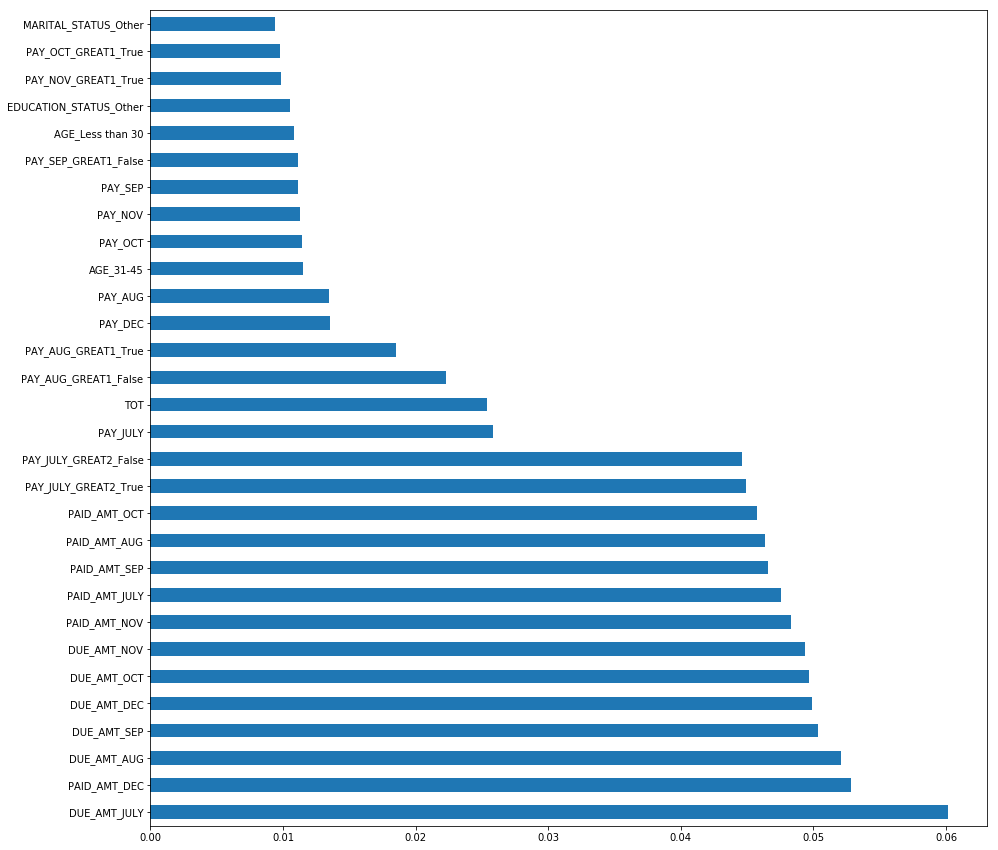

In [14]:
X = train_data.drop(['NEXT_MONTH_DEFAULT','Client_ID','Balance_Limit_V1'],axis=1)  #independent columns
y = train_data['NEXT_MONTH_DEFAULT']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
plt.figure(figsize=(15,15))
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [15]:
t1=train_data.drop(['Client_ID', 'Balance_Limit_V1', 'PAY_AUG', 'PAY_SEP',
       'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 
         'Gender_F',
       'Gender_M', 'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
       'EDUCATION_STATUS_Other', 'MARITAL_STATUS_Other',
       'MARITAL_STATUS_Single', 'AGE_31-45', 'AGE_46-65', 'AGE_Less than 30',
       'AGE_More than 65', 'PAY_SEP_GREAT1_False',
       'PAY_SEP_GREAT1_True', 'PAY_OCT_GREAT1_False', 'PAY_OCT_GREAT1_True',
       'PAY_NOV_GREAT1_False', 'PAY_NOV_GREAT1_True', 'PAY_DEC_GREAT1_False',
       'PAY_DEC_GREAT1_True'],axis=1)


t2=predict_data.drop(['Client_ID', 'Balance_Limit_V1', 'PAY_AUG', 'PAY_SEP',
       'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 
         'Gender_F',
       'Gender_M', 'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
       'EDUCATION_STATUS_Other', 'MARITAL_STATUS_Other',
       'MARITAL_STATUS_Single', 'AGE_31-45', 'AGE_46-65', 'AGE_Less than 30',
       'AGE_More than 65', 'PAY_SEP_GREAT1_False',
       'PAY_SEP_GREAT1_True', 'PAY_OCT_GREAT1_False', 'PAY_OCT_GREAT1_True',
       'PAY_NOV_GREAT1_False', 'PAY_NOV_GREAT1_True', 'PAY_DEC_GREAT1_False',
       'PAY_DEC_GREAT1_True'],axis=1)

In [9]:
y_train_ud.value_counts().plot(kind='bar', title='Count (target)')

NameError: name 'y_train_ud' is not defined

In [16]:
X_train_ud, X, y_train_ud, y = train_test_split(t1.drop('NEXT_MONTH_DEFAULT',axis=1),t1['NEXT_MONTH_DEFAULT'],test_size = 0.3,shuffle=True)
X_val_ud, X_test_ud, y_val_ud, y_test_ud = train_test_split(X,y,test_size = 0.5,shuffle=False) 

X_predict_ud=t2

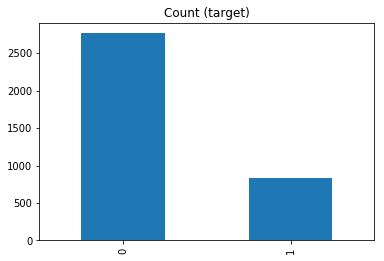

In [17]:
y_test_ud.value_counts().plot(kind='bar', title='Count (target)')


In [266]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
#X_train_ud,y_train_ud=ros.fit_resample(X_train_ud,y_train_ud)
#X_val_ud,y_val_ud=ros.fit_resample(X_val_ud,y_val_ud)
#X_test_ud,y_test_ud=ros.fit_resample(X_test_ud,y_test_ud)

In [18]:
std_scale = MinMaxScaler().fit(X_train_ud)
X_train_ud = pd.DataFrame(std_scale.transform(X_train_ud))
X_test_ud  = pd.DataFrame(std_scale.transform(X_test_ud))
X_val_ud  = pd.DataFrame(std_scale.transform(X_val_ud))
X_predict_ud  = pd.DataFrame(std_scale.transform(X_predict_ud))
#X_predict  = pd.DataFrame(std_scale.transform(predict_data))

In [19]:
X_train_ud.shape,X_predict_ud.shape

((16800, 18), (6000, 18))

In [20]:
%store X_train_ud
%store y_train_ud
%store X_test_ud
%store y_test_ud
%store X_val_ud
%store y_val_ud
%store X_predict_ud

Stored 'X_train_ud' (DataFrame)
Stored 'y_train_ud' (Series)
Stored 'X_test_ud' (DataFrame)
Stored 'y_test_ud' (Series)
Stored 'X_val_ud' (DataFrame)
Stored 'y_val_ud' (Series)
Stored 'X_predict_ud' (DataFrame)


[0.03377504 0.07851734 0.04191809 0.0275616  0.0235519  0.02045534
 0.02177766 0.0387448  0.03406929 0.03379062 0.03270027 0.03244505
 0.03226078 0.03246383 0.03136434 0.0309239  0.03020093 0.03080548
 0.03276699 0.02480428 0.02395598 0.02239881 0.02037231 0.02188527
 0.02278802 0.02497848 0.00331849 0.00296191 0.0033347  0.00420881
 0.00663178 0.05184829 0.00965608 0.00953865 0.01120158 0.01075627
 0.01303169 0.01012403 0.00985566 0.01396947 0.01095065 0.01268301
 0.00127113 0.00634802 0.00703338]


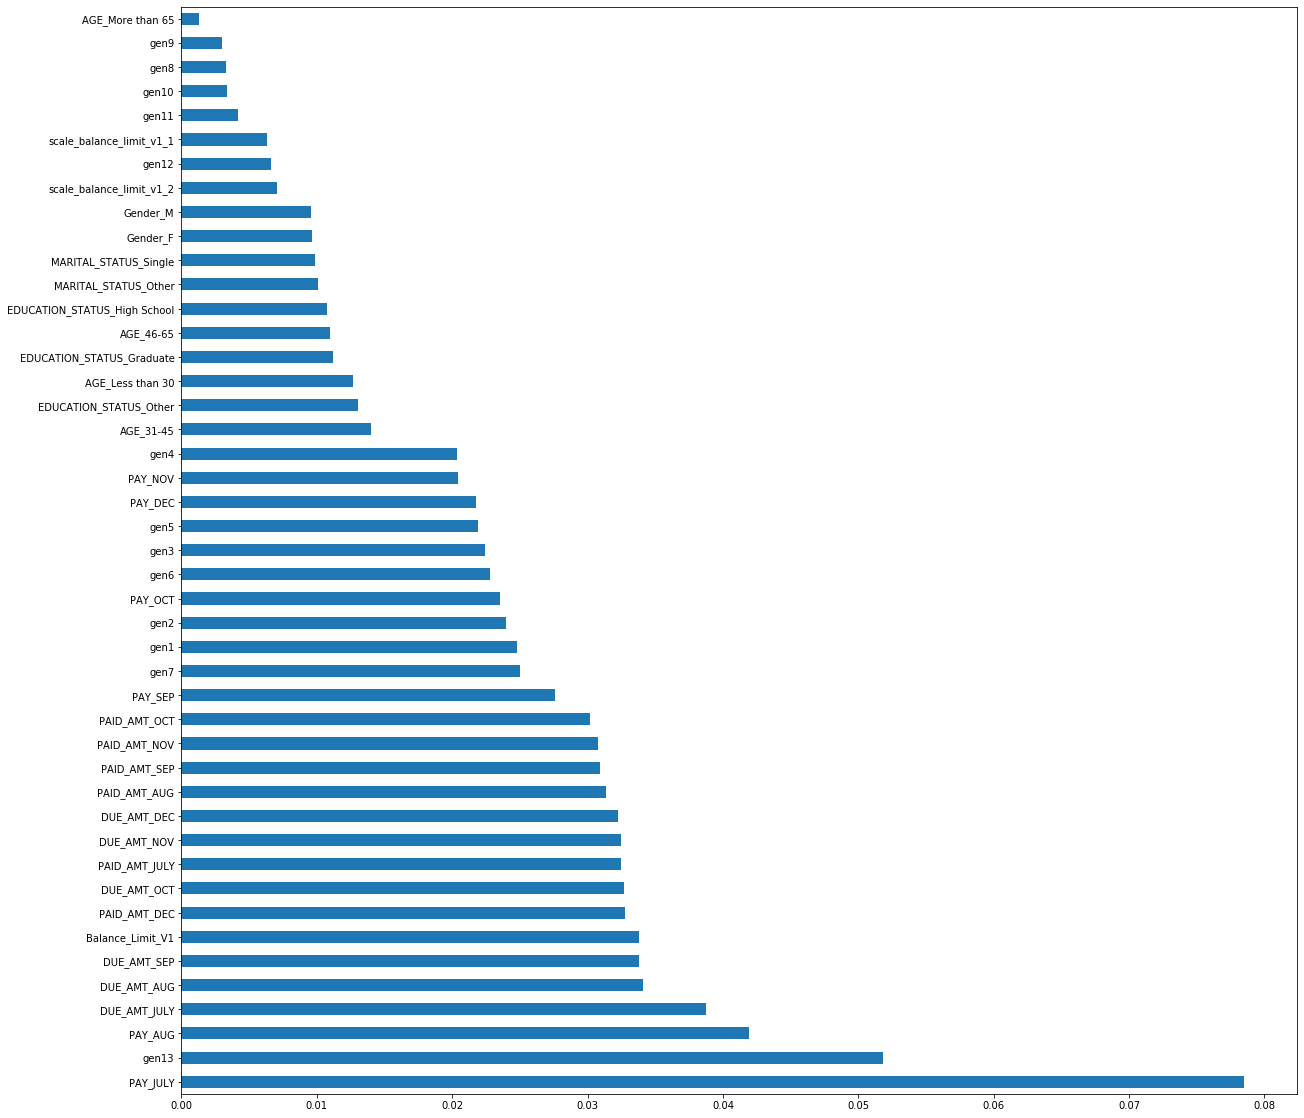

In [162]:
X = x_udith  #independent columns
y = y_udith    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(20,20))
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()